<a href="https://colab.research.google.com/github/msinvhal/S-P-500-Index-Movement-Prediction-/blob/main/142Project_S%26P_Movement_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: Importing & Cleaning

In [ ]:
import numpy as np
import pandas as pd
import os
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import seaborn as sns
sns.set(style = "whitegrid",
        color_codes = True,
        font_scale = 1.5)
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Importing all the features
S_P = pd.read_csv("/S_P 500 Historical Data.csv")
Unemployment = pd.read_csv("/Unemployment.csv")
MortgageRate = pd.read_csv("/30YearFixedRateMortgage.csv")
Interest = pd.read_csv("/Interest Rates 1980.csv")
Gas = pd.read_csv("/1980 Gas Prices.csv")
Consumer_Spending = pd.read_csv("/1980 Consumer Expenditure.csv")
US_Aus_Ex = pd.read_csv("/AusUSEX.csv")
Federal_Surplus = pd.read_csv("/Fed Surplus.csv")
Fed_Employees = pd.read_csv("/Federal Employees (in thousands).csv")
Humidity = pd.read_csv("/NYC humidity.csv")
Cloud_Cover = pd.read_csv("/NYC cloud.csv")
Interest_Rate_Spread = pd.read_csv("/Interest Rate Spread (normalized).csv")
CPI = pd.read_csv("/CPI.csv")
GDP = pd.read_csv("/GDP (normalized).csv")
Personal_Savings_Rate = pd.read_csv("/Personal Savings Rate.csv")
DEXUSUK = pd.read_csv("/DEXUSUK.csv")

# Data Cleaning


In [ ]:
#Cleaning the S&P 500 dataset by removing unnecessary columns and fixing the date column to be datetime format
S_P.drop(columns=['Vol.'], inplace=True)
S_P.rename(columns={'Date': 'DATE'}, inplace=True)
S_P['DATE'] = pd.to_datetime(S_P['DATE'])
S_P.sort_values(by='DATE', inplace=True)
S_P.reset_index(drop=True, inplace=True)
S_P.head()

,DATE,Price,Open,High,Low,Change %
0,1980-01-01,114.16,107.94,117.17,103.26,5.76%
1,1980-02-01,113.66,114.16,120.22,111.33,-0.44%
2,1980-03-01,102.09,113.66,114.34,94.23,-10.18%
3,1980-04-01,106.29,102.09,106.79,98.95,4.11%
4,1980-05-01,111.24,106.29,112.72,103.50,4.66%


In [ ]:
#Cleaning the Unemployment dataset by fixing the date column to be datetime format, renaming columns for easier data processing, and filtering for dates after Jan 1 1980
Unemployment['DATE'] = pd.to_datetime(Unemployment['DATE'])
Unemployment.rename(columns={'UNRATE': 'Unemployment Rate'}, inplace=True)
Unemployment = Unemployment[Unemployment['DATE'] >= '1980-01-01']
Unemployment.head()

,DATE,Unemployment Rate
360,1980-01-01,6.3
361,1980-02-01,6.3
362,1980-03-01,6.3
363,1980-04-01,6.9
364,1980-05-01,7.5


In [ ]:
# Assuming you have a DataFrame named 'DEXUSUK' with columns 'datetime' and 'DEXUSUK'
DEXUSUK['datetime'] = pd.to_datetime(DEXUSUK['datetime'], format='%m/%d/%y')
DEXUSUK['DEXUSUK'] = pd.to_numeric(DEXUSUK['DEXUSUK'], errors='coerce')  # Convert to numeric, coerce errors to NaN
DEXUSUK['datetime'] = DEXUSUK['datetime'].dt.to_period('M').dt.to_timestamp()

monthly_avg_DEXUSUK = DEXUSUK.groupby('datetime')['DEXUSUK'].mean().reset_index()
monthly_avg_DEXUSUK.rename(columns={'datetime': 'DATE'}, inplace=True)
monthly_avg_DEXUSUK['DATE'] = pd.to_datetime(monthly_avg_DEXUSUK['DATE'])
monthly_avg_DEXUSUK.head()


,DATE,DEXUSUK
0,1980-01-01,2.264100
1,1980-02-01,2.289116
2,1980-03-01,2.204514
3,1980-04-01,2.209364
4,1980-05-01,2.302024


In [ ]:
#Cleaning the MortgageRate dataset by fixing the date column to be datetime format, renaming columns for easier data processing, and filtering for dates after Jan 1 1980
MortgageRate['DATE'] = pd.to_datetime(MortgageRate['DATE'])
MortgageRate = MortgageRate[MortgageRate['DATE'].dt.day == 1]
MortgageRate.rename(columns={'MORTGAGE30US': 'Mortgage Rate'}, inplace=True)
MortgageRate = MortgageRate[MortgageRate['DATE'] >= '1980-01-01']
MortgageRate.head()

,DATE,Mortgage Rate
105,1980-01-01,12.8775
106,1980-02-01,13.0400
107,1980-03-01,15.2825
108,1980-04-01,16.3250
109,1980-05-01,14.2620


In [ ]:
#Cleaning the Interest dataset by fixing the date column to be datetime format and renaming columns for easier data processing
Interest['DATE'] = pd.to_datetime(Interest['DATE'])
Interest.rename(columns={'DFF': 'Interest Rate'}, inplace=True)
Interest.head()

,DATE,Interest Rate
0,1980-01-01,13.816774
1,1980-02-01,14.126207
2,1980-03-01,17.192258
3,1980-04-01,17.607667
4,1980-05-01,10.983226


In [ ]:
#Cleaning the Gas dataset by fixing the date column to be datetime format and renaming columns for easier data processing
Gas['DATE'] = pd.to_datetime(Gas['DATE'])
Gas.rename(columns={'APU000074714': 'Gas Prices'}, inplace=True)
Gas.head()

,DATE,Gas Prices
0,1980-01-01,1.131
1,1980-02-01,1.207
2,1980-03-01,1.252
3,1980-04-01,1.264
4,1980-05-01,1.266


In [ ]:
#Cleaning the Consumer Spending dataset by fixing the date column to be datetime format and renaming columns for easier data processing
Consumer_Spending['DATE'] = pd.to_datetime(Consumer_Spending['DATE'])
Consumer_Spending.rename(columns={'PCE': 'Consumer Spending'}, inplace=True)
Consumer_Spending.head()

,DATE,Consumer Spending
0,1980-01-01,1697.3
1,1980-02-01,1701.4
2,1980-03-01,1708.2
3,1980-04-01,1695.2
4,1980-05-01,1700.1


In [ ]:
#Cleaning US to Australia exchange rate dataset by fixing the date column to be datetime format and renaming columns for easier data processing
US_Aus_Ex.rename(columns={'DEXUSAL': "US to Aus X"}, inplace=True)
US_Aus_Ex['DATE'] = pd.to_datetime(US_Aus_Ex['DATE'])
US_Aus_Ex.head()

,DATE,US to Aus X
0,1980-01-01,1.109677
1,1980-02-01,1.104126
2,1980-03-01,1.090338
3,1980-04-01,1.091027
4,1980-05-01,1.130205


In [ ]:
#Cleaning Federal Surplus dataset by fixing the date column to be datetime format and renaming columns for easier data processing
Federal_Surplus.rename(columns={'MTSDS133FMS': "Federal Surplus"}, inplace=True)
Federal_Surplus['DATE'] = pd.to_datetime(Federal_Surplus['DATE'])
Federal_Surplus.head()

,DATE,Federal Surplus
0,1980-10-01,-16921.0
1,1980-11-01,-8907.0
2,1980-12-01,-1965.0
3,1981-01-01,-12192.0
4,1981-02-01,-15620.0


In [ ]:
#Cleaning Fed Employees exchange rate dataset by fixing the date column to be datetime format and renaming columns for easier data processing
Fed_Employees.rename(columns={'CES9091000001': "Fed Employees Amount"}, inplace=True)
Fed_Employees['DATE'] = pd.to_datetime(Fed_Employees['DATE'])
Fed_Employees.head()

,DATE,Fed Employees Amount
0,1980-01-01,2886.0
1,1980-02-01,2907.0
2,1980-03-01,2960.0
3,1980-04-01,3258.0
4,1980-05-01,3088.0


In [ ]:
#Cleaning Humidity dataset by fixing the date column to be datetime format, renaming columns for easier data processing, and grouping data by months
Humidity['datetime'] = pd.to_datetime(Humidity['datetime'], format='%d/%m/%y').dt.to_period('M').dt.to_timestamp()
monthly_avg_humidity = Humidity.groupby('datetime')['humidity'].mean().reset_index()
monthly_avg_humidity.rename(columns={'datetime': 'DATE'}, inplace=True)
monthly_avg_humidity['DATE'] = pd.to_datetime(monthly_avg_humidity['DATE'])
monthly_avg_humidity.head()

,DATE,humidity
0,1980-01-01,56.993548
1,1980-02-01,52.341379
2,1980-03-01,63.741935
3,1980-04-01,63.336667
4,1980-05-01,57.870968


In [ ]:
#Cleaning Cloud Cover dataset by fixing the date column to be datetime format, renaming columns for easier data processing, and grouping data by months
Cloud_Cover['datetime'] = pd.to_datetime(Cloud_Cover['datetime'], format='%d/%m/%y').dt.to_period('M').dt.to_timestamp()
monthly_avg_Cloud_Cover = Cloud_Cover.groupby('datetime')['cloudcover'].mean().reset_index()
monthly_avg_Cloud_Cover.rename(columns={'datetime': 'DATE'}, inplace=True)
monthly_avg_Cloud_Cover['DATE'] = pd.to_datetime(monthly_avg_Cloud_Cover['DATE'])
monthly_avg_Cloud_Cover.head()

,DATE,cloudcover
0,1980-01-01,60.545161
1,1980-02-01,49.248276
2,1980-03-01,65.532258
3,1980-04-01,62.396667
4,1980-05-01,62.993548


In [ ]:
#Cleaning CPI dataset by fixing the date column to be datetime format, renaming columns for easier data processing, and filtering data to start on Jan 1 1980
CPI.rename(columns={'CPIAUCSL':'CPI'}, inplace=True)
CPI = CPI[CPI['DATE'] >= '1980-01-01']
CPI['DATE'] = pd.to_datetime(CPI['DATE'])
CPI.head()

<ipython-input-238-6686b1afb73d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPI['DATE'] = pd.to_datetime(CPI['DATE'])


,DATE,CPI
396,1980-01-01,78.0
397,1980-02-01,79.0
398,1980-03-01,80.1
399,1980-04-01,80.9
400,1980-05-01,81.7


In [ ]:
#Cleaning Interest Rate Spread dataset by fixing the date column to be datetime format, renaming columns for easier data processing, and filtering data to start on Jan 1 1980
Interest_Rate_Spread.rename(columns={'USALOCOSINOSTSAM':'Interest Rate Spread'}, inplace=True)
Interest_Rate_Spread = Interest_Rate_Spread[Interest_Rate_Spread['DATE'] >= '1980-01-01']
Interest_Rate_Spread['DATE'] = pd.to_datetime(Interest_Rate_Spread['DATE'])
Interest_Rate_Spread.head()

<ipython-input-239-50ae7a38aa2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interest_Rate_Spread['DATE'] = pd.to_datetime(Interest_Rate_Spread['DATE'])


,DATE,Interest Rate Spread
240,1980-01-01,96.860369
241,1980-02-01,97.029528
242,1980-03-01,97.503811
243,1980-04-01,98.282414
244,1980-05-01,99.200175


In [ ]:
#Cleaning GDP dataset by fixing the date column to be datetime format, renaming columns for easier data processing, and filtering data to start on Jan 1 1980
GDP.rename(columns={'USALORSGPNOSTSAM':'GDP'}, inplace=True)
GDP = GDP[GDP['DATE'] >= '1980-01-01']
GDP['DATE'] = pd.to_datetime(GDP['DATE'])
GDP.head()

<ipython-input-240-9f4205134fd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP['DATE'] = pd.to_datetime(GDP['DATE'])


,DATE,GDP
240,1980-01-01,101.605829
241,1980-02-01,101.259018
242,1980-03-01,100.836136
243,1980-04-01,100.389157
244,1980-05-01,99.985739


In [ ]:
#Cleaning Personal Savings Rate dataset by fixing the date column to be datetime format, renaming columns for easier data processing, and filtering data to start on Jan 1 1980
Personal_Savings_Rate.rename(columns={'PSAVERT':'Personal Savings Rate'}, inplace=True)
Personal_Savings_Rate = Personal_Savings_Rate[Personal_Savings_Rate['DATE'] >= '1980-01-01']
Personal_Savings_Rate['DATE'] = pd.to_datetime(Personal_Savings_Rate['DATE'])
Personal_Savings_Rate.head()

<ipython-input-241-e4ad49c7e5d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Personal_Savings_Rate['DATE'] = pd.to_datetime(Personal_Savings_Rate['DATE'])


,DATE,Personal Savings Rate
252,1980-01-01,9.9
253,1980-02-01,10.1
254,1980-03-01,10.3
255,1980-04-01,11.4
256,1980-05-01,11.5


In [ ]:
#Cleaning CPI dataset by fixing the date column to be datetime format, renaming columns for easier data processing, and filtering data to start on Jan 1 1980
CPI.rename(columns={'CPIAUCSL':'CPI'}, inplace=True)
CPI = CPI[CPI['DATE'] >= '1980-01-01']
CPI['DATE'] = pd.to_datetime(CPI['DATE'])
CPI.head()

,DATE,CPI
396,1980-01-01,78.0
397,1980-02-01,79.0
398,1980-03-01,80.1
399,1980-04-01,80.9
400,1980-05-01,81.7


In [ ]:
#Cleaning Interest Rate Spread dataset by fixing the date column to be datetime format, renaming columns for easier data processing, and filtering data to start on Jan 1 1980
Interest_Rate_Spread.rename(columns={'USALOCOSINOSTSAM':'IR_Spread'}, inplace=True)
Interest_Rate_Spread = Interest_Rate_Spread[Interest_Rate_Spread['DATE'] >= '1980-01-01']
Interest_Rate_Spread['DATE'] = pd.to_datetime(Interest_Rate_Spread['DATE'])
Interest_Rate_Spread.head()

,DATE,Interest Rate Spread
240,1980-01-01,96.860369
241,1980-02-01,97.029528
242,1980-03-01,97.503811
243,1980-04-01,98.282414
244,1980-05-01,99.200175


In [ ]:
#Final dataframe with cleaned data for machine learning models and analysis
dfs = [S_P, Unemployment, Interest, Gas, Consumer_Spending, US_Aus_Ex, Federal_Surplus, Fed_Employees, CPI, GDP, Interest_Rate_Spread, Personal_Savings_Rate, monthly_avg_humidity, monthly_avg_Cloud_Cover, monthly_avg_DEXUSUK]
final_df = reduce(lambda left,right: pd.merge(left,right,on=['DATE'],  how='left'), dfs)
final_df

,DATE,Price,Open,High,Low,Change %,Unemployment Rate,Interest Rate,Gas Prices,Consumer Spending,US to Aus X,Federal Surplus,Fed Employees Amount,CPI,GDP,Interest Rate Spread,Personal Savings Rate,humidity,cloudcover,DEXUSUK
0,1980-01-01,114.16,107.94,117.17,103.26,5.76%,6.3,13.816774,1.131,1697.3,1.109677,NaN,2886.0,78.000,101.605829,96.860369,9.9,56.993548,60.545161,2.264100
1,1980-02-01,113.66,114.16,120.22,111.33,-0.44%,6.3,14.126207,1.207,1701.4,1.104126,NaN,2907.0,79.000,101.259018,97.029528,10.1,52.341379,49.248276,2.289116
2,1980-03-01,102.09,113.66,114.34,94.23,-10.18%,6.3,17.192258,1.252,1708.2,1.090338,NaN,2960.0,80.100,100.836136,97.503811,10.3,63.741935,65.532258,2.204514
3,1980-04-01,106.29,102.09,106.79,98.95,4.11%,6.9,17.607667,1.264,1695.2,1.091027,NaN,3258.0,80.900,100.389157,98.282414,11.4,63.336667,62.396667,2.209364
4,1980-05-01,111.24,106.29,112.72,103.50,4.66%,7.5,10.983226,1.266,1700.1,1.130205,NaN,3088.0,81.700,99.985739,99.200175,11.5,57.870968,62.993548,2.302024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2023-08-01,"4,507.66","4,576.21","4,584.24","4,337.77",-1.77%,3.8,5.330000,3.955,18689.9,0.648596,89255.572694,2944.0,306.269,100.289174,98.780814,4.0,66.496774,47.919355,1.270622
524,2023-09-01,"4,288.05","4,534.42","4,540.16","4,238.53",-4.87%,3.8,5.330000,3.988,18823.4,0.642470,-170982.200875,2948.0,307.481,NaN,99.037917,3.4,71.356667,43.403333,1.238145
525,2023-10-01,"4,193.80","4,280.50","4,393.73","4,103.49",-2.20%,3.9,5.330000,3.782,18864.7,0.634743,-66563.551130,2951.0,307.619,NaN,99.326563,NaN,68.500000,41.019355,1.217524
526,2023-11-01,"4,567.78","4,203.62","4,588.00","4,196.92",8.92%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.286667,25.673333,1.243740


In [ ]:
final_df = final_df.head(524)

In [ ]:
#Converting column datatypes for easier data processing and filling navalues with 0 values
final_df['Change %'] = final_df['Change %'].str.rstrip('%').astype('float')

final_df = final_df.fillna(0)

columns_to_convert = ['Price', 'Open', 'High', 'Low']
final_df[columns_to_convert] = final_df[columns_to_convert].replace(',', '', regex=True).apply(pd.to_numeric)
final_df

<ipython-input-246-8e36a5584888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Change %'] = final_df['Change %'].str.rstrip('%').astype('float')


,DATE,Price,Open,High,Low,Change %,Unemployment Rate,Interest Rate,Gas Prices,Consumer Spending,US to Aus X,Federal Surplus,Fed Employees Amount,CPI,GDP,Interest Rate Spread,Personal Savings Rate,humidity,cloudcover,DEXUSUK
0,1980-01-01,114.16,107.94,117.17,103.26,5.76,6.3,13.816774,1.131,1697.3,1.109677,0.000000,2886.0,78.000,101.605829,96.860369,9.9,56.993548,60.545161,2.264100
1,1980-02-01,113.66,114.16,120.22,111.33,-0.44,6.3,14.126207,1.207,1701.4,1.104126,0.000000,2907.0,79.000,101.259018,97.029528,10.1,52.341379,49.248276,2.289116
2,1980-03-01,102.09,113.66,114.34,94.23,-10.18,6.3,17.192258,1.252,1708.2,1.090338,0.000000,2960.0,80.100,100.836136,97.503811,10.3,63.741935,65.532258,2.204514
3,1980-04-01,106.29,102.09,106.79,98.95,4.11,6.9,17.607667,1.264,1695.2,1.091027,0.000000,3258.0,80.900,100.389157,98.282414,11.4,63.336667,62.396667,2.209364
4,1980-05-01,111.24,106.29,112.72,103.50,4.66,7.5,10.983226,1.266,1700.1,1.130205,0.000000,3088.0,81.700,99.985739,99.200175,11.5,57.870968,62.993548,2.302024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2023-04-01,4169.48,4102.50,4170.52,4049.30,1.46,3.4,4.830000,3.735,18363.8,0.668840,176180.790349,2910.0,302.918,99.866273,98.444913,5.2,58.200000,46.360000,1.244575
520,2023-05-01,4179.83,4166.27,4229.98,4048.00,0.25,3.7,5.055806,3.685,18407.8,0.664345,-240348.239658,2919.0,303.294,99.943470,98.395192,5.3,53.070968,22.500000,1.248373
521,2023-06-01,4450.38,4183.84,4458.43,4171.00,6.47,3.6,5.076333,3.712,18485.4,0.671262,-227768.412538,2925.0,303.841,100.045476,98.443656,4.9,64.846667,44.190000,1.262719
522,2023-07-01,4588.96,4444.17,4606.00,4385.18,3.11,3.5,5.120000,3.732,18621.3,0.674150,-220782.097354,2935.0,304.348,100.164368,98.577464,4.1,69.670968,32.306452,1.289345


In [ ]:
 #Looking at Price column for final dataframe
 final_df['Price']

0       114.16
1       113.66
2       102.09
3       106.29
4       111.24
        ...   
519    4169.48
520    4179.83
521    4450.38
522    4588.96
523    4507.66
Name: Price, Length: 524, dtype: float64

In [ ]:
#Creating training and test data for S&P analysis from final dataframe by filtering on dates
SP_training = final_df[(final_df['DATE'] < '2020-09-01') & (final_df['DATE'] > '2010-01-01')]
SP_test = final_df[(final_df['DATE'] >= '2022-09-01')]

In [ ]:
SP_test

,DATE,Price,Open,High,Low,Change %,Unemployment Rate,Interest Rate,Gas Prices,Consumer Spending,US to Aus X,Federal Surplus,Fed Employees Amount,CPI,GDP,Interest Rate Spread,Personal Savings Rate,humidity,cloudcover,DEXUSUK
512,2022-09-01,3585.62,3929.90,4119.69,3585.40,-9.34,3.5,2.555000,3.881,17804.0,0.667110,-429673.478962,2867.0,296.539,99.622947,100.667293,3.0,61.506667,39.180000,1.131971
513,2022-10-01,3871.98,3624.07,3906.05,3490.00,7.99,3.7,3.080000,4.016,17915.1,0.637030,-87797.836311,2871.0,297.987,99.653793,100.286221,3.0,64.125806,47.303226,1.133225
514,2022-11-01,4080.11,3911.50,4080.11,3695.60,5.38,3.6,3.780000,3.853,17892.5,0.659585,-248534.880653,2873.0,298.598,99.685812,99.873442,3.3,58.766667,39.080000,1.172735
515,2022-12-01,3839.50,4089.50,4103.05,3764.14,-5.90,3.5,4.104194,3.356,17943.6,0.674805,-85000.736578,2874.0,298.990,99.715486,99.466742,3.4,60.561290,45.190323,1.218019
516,2023-01-01,4076.60,3858.38,4094.32,3793.67,6.18,3.4,4.330000,3.452,18229.6,0.695545,-38783.771839,2886.0,300.536,99.743421,99.105820,4.4,63.116129,68.012903,1.223735
517,2023-02-01,3970.15,4063.85,4195.34,3942.86,-2.61,3.6,4.570000,3.514,18296.5,0.689305,-262433.843194,2895.0,301.648,99.773451,98.812109,4.7,57.946429,36.289286,1.208400
518,2023-03-01,4109.31,3958.20,4110.80,3810.54,3.51,3.5,4.649032,3.551,18282.6,0.667604,-378076.316472,2906.0,301.808,99.811833,98.589191,5.2,56.445161,44.387097,1.213778
519,2023-04-01,4169.48,4102.50,4170.52,4049.30,1.46,3.4,4.830000,3.735,18363.8,0.668840,176180.790349,2910.0,302.918,99.866273,98.444913,5.2,58.200000,46.360000,1.244575
520,2023-05-01,4179.83,4166.27,4229.98,4048.00,0.25,3.7,5.055806,3.685,18407.8,0.664345,-240348.239658,2919.0,303.294,99.943470,98.395192,5.3,53.070968,22.500000,1.248373
521,2023-06-01,4450.38,4183.84,4458.43,4171.00,6.47,3.6,5.076333,3.712,18485.4,0.671262,-227768.412538,2925.0,303.841,100.045476,98.443656,4.9,64.846667,44.190000,1.262719


In [ ]:
#Created test and train datasets from S&P dataframe
X_train_og= SP_training[['Change %', 'Unemployment Rate', 'Interest Rate', 'Gas Prices', 'Consumer Spending', 'US to Aus X', 'Federal Surplus', 'Fed Employees Amount', 'CPI', 'GDP', 'Interest Rate Spread', 'Personal Savings Rate', 'humidity', 'cloudcover', 'DEXUSUK']]
y_train_og = SP_training['Price']

X_test_og= SP_test[['Change %', 'Unemployment Rate', 'Interest Rate', 'Gas Prices', 'Consumer Spending', 'US to Aus X', 'Federal Surplus', 'Fed Employees Amount', 'CPI', 'GDP', 'Interest Rate Spread', 'Personal Savings Rate', 'humidity', 'cloudcover', 'DEXUSUK']]
y_test_og = SP_test['Price']



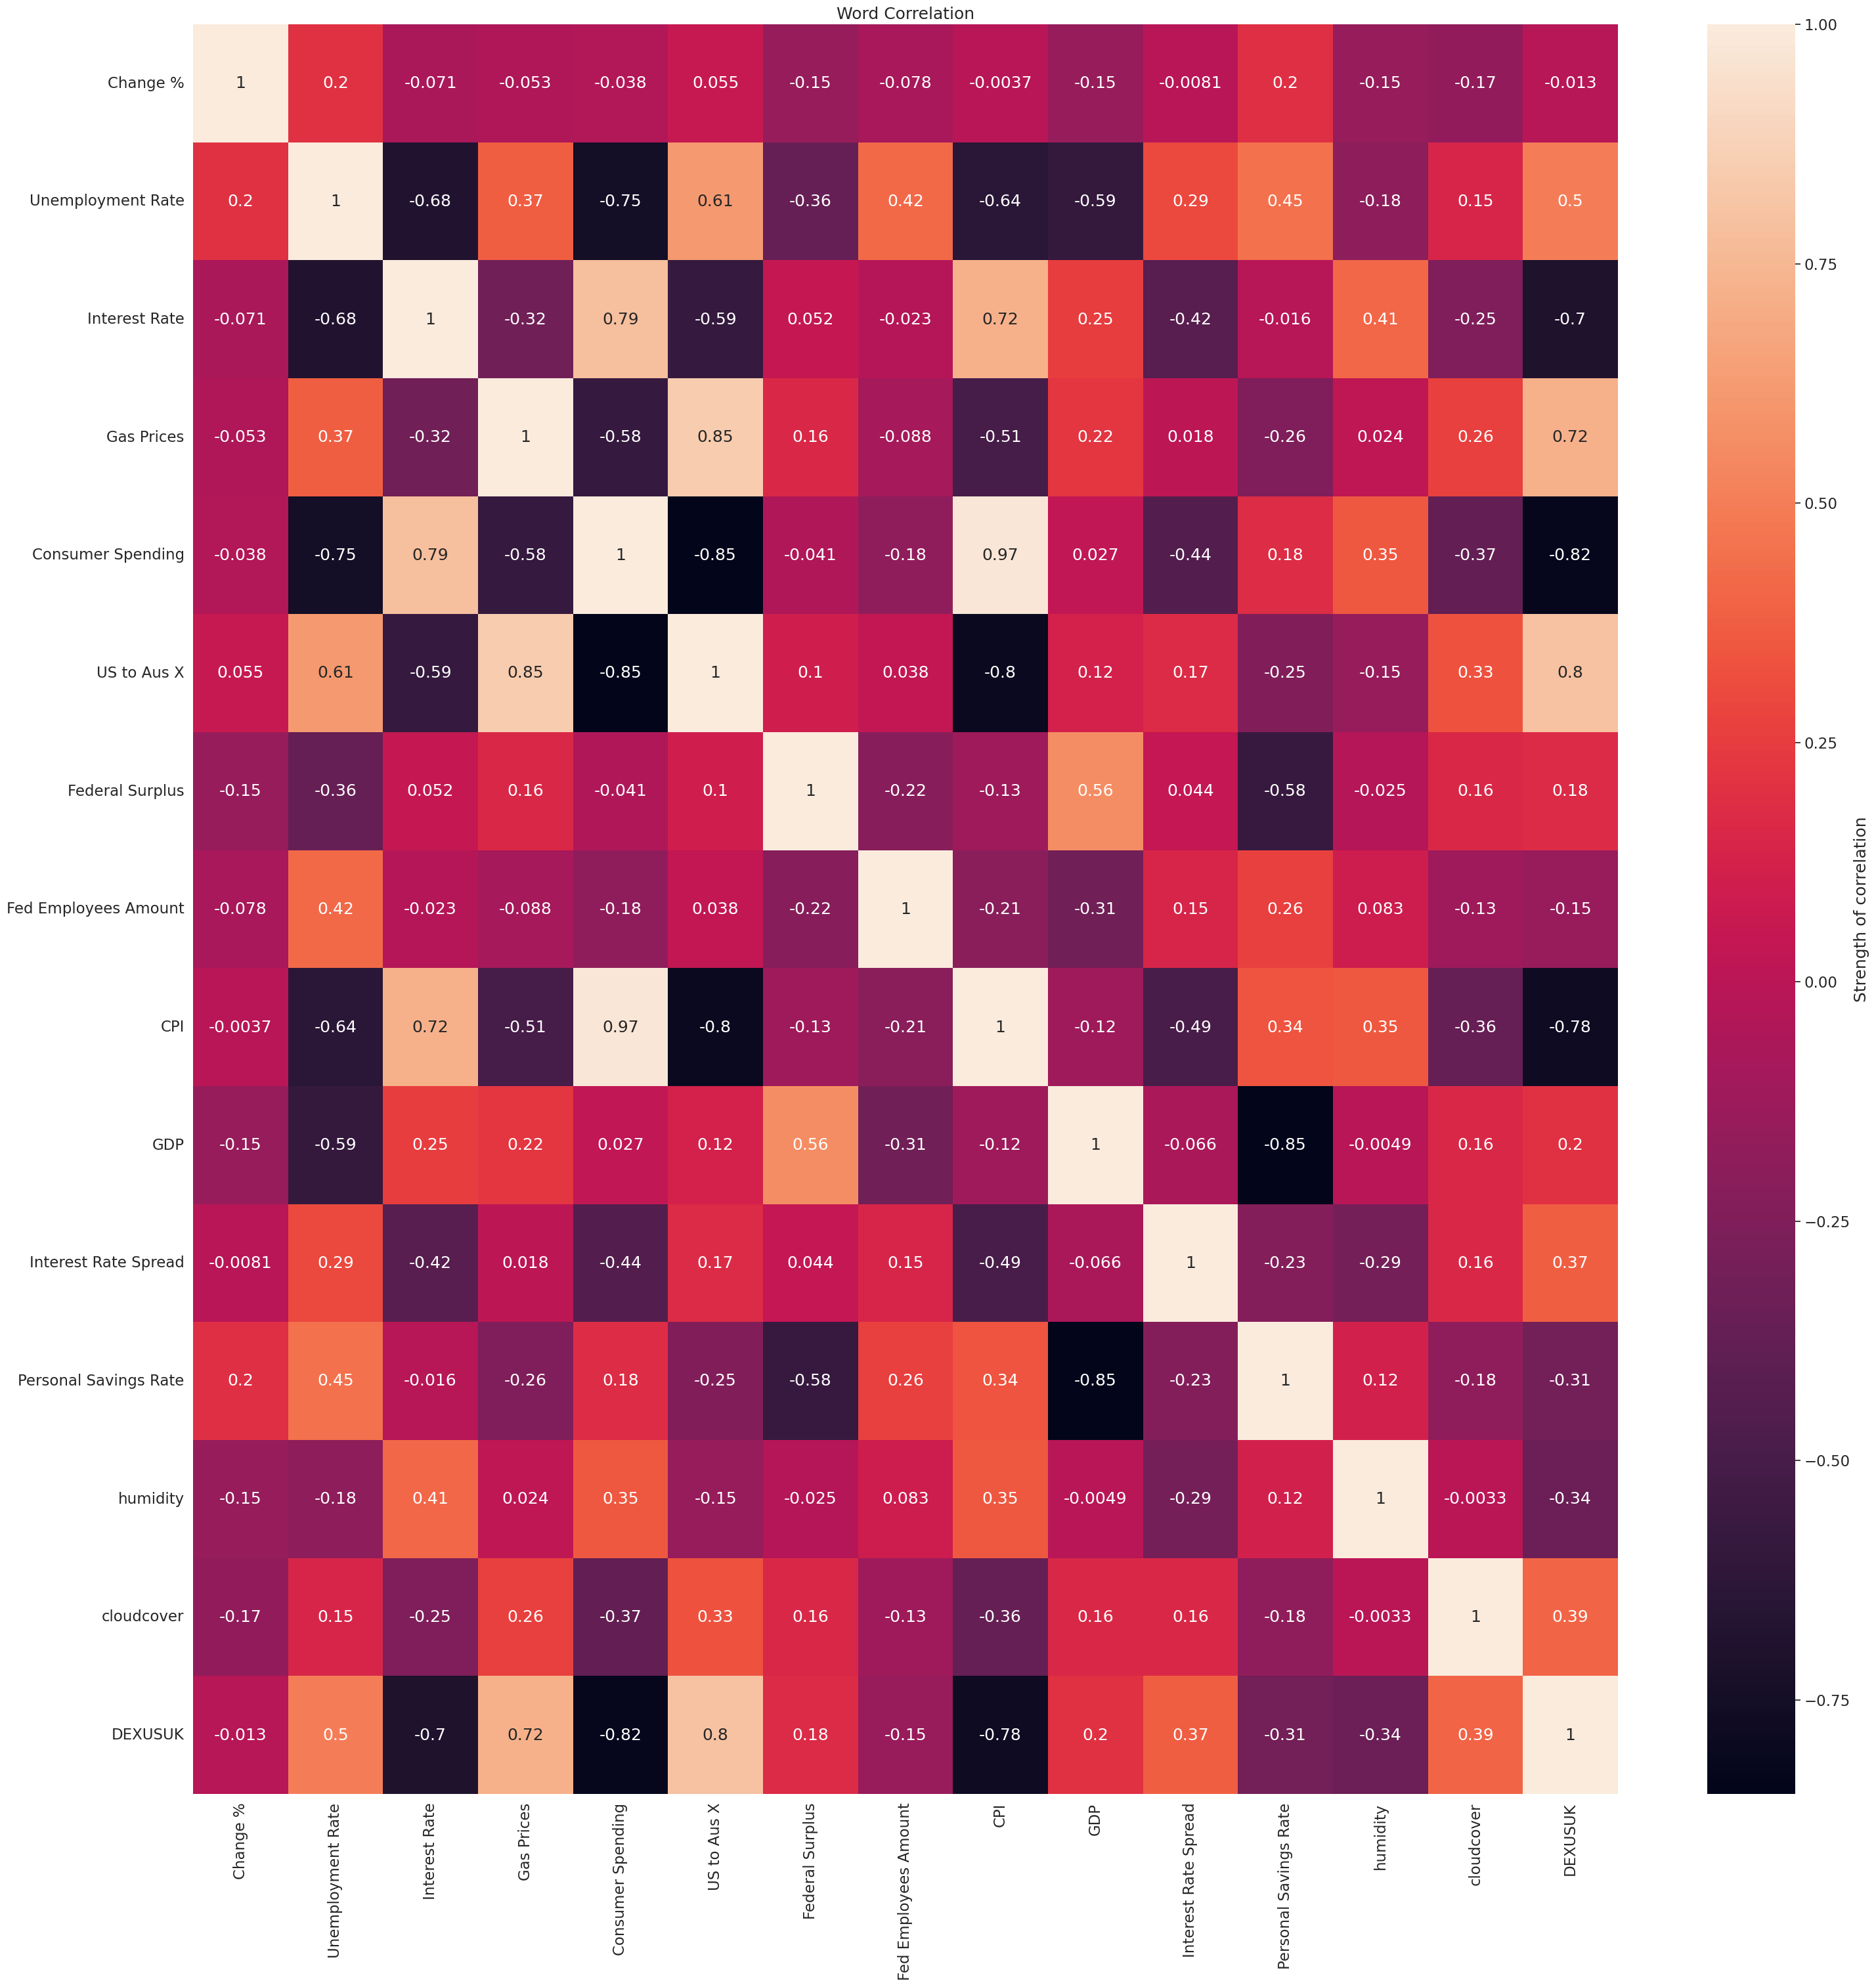

In [ ]:
#Matrix of chosen features showing multicollinearity
all_feautures= X_train_og
plt.figure(figsize=(35, 35))
sns.heatmap(all_feautures.corr(), cbar_kws={'label':'Strength of correlation'}, annot=True)
plt.title("Word Correlation")
plt.show()

In [ ]:
# We calculted VIF scores and sequentially removed Open, Low, High because they had the highest VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, colum):
    values = sm.add_constant(df[colum]).values
    num_columns = len(colum)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=colum)

columns = ['Change %', 'Unemployment Rate', 'Interest Rate', 'Gas Prices', 'Consumer Spending', 'US to Aus X', 'Federal Surplus', 'Fed Employees Amount', 'CPI', 'GDP', 'Interest Rate Spread', 'Personal Savings Rate', 'humidity', 'cloudcover']
VIF(X_train_og, columns)

Change %                   1.396303
Unemployment Rate         29.321170
Interest Rate              4.921508
Gas Prices                11.190938
Consumer Spending        166.999307
US to Aus X               14.640537
Federal Surplus            1.623426
Fed Employees Amount       2.239306
CPI                      167.660396
GDP                        8.602737
Interest Rate Spread       2.131576
Personal Savings Rate     15.064463
humidity                   1.504368
cloudcover                 1.417812
dtype: float64

In [ ]:
#Removing Consumer Spending feature
def VIF(df, colum):
    values = sm.add_constant(df[colum]).values
    num_columns = len(colum)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=colum)

columns = ['Change %', 'Unemployment Rate', 'CPI', 'Interest Rate', 'Gas Prices', 'US to Aus X', 'Federal Surplus', 'Fed Employees Amount', 'GDP', 'Interest Rate Spread', 'Personal Savings Rate', 'humidity', 'cloudcover']
VIF(X_train_og, columns)


Change %                  1.384443
Unemployment Rate        28.788096
CPI                      18.726537
Interest Rate             3.671381
Gas Prices                6.562910
US to Aus X              14.494993
Federal Surplus           1.623424
Fed Employees Amount      2.061046
GDP                       7.666430
Interest Rate Spread      2.093076
Personal Savings Rate    11.577975
humidity                  1.445169
cloudcover                1.356056
dtype: float64

In [ ]:
#Removing Unemployment Rate feature
def VIF(df, colum):
    values = sm.add_constant(df[colum]).values
    num_columns = len(colum)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=colum)

columns = ['Change %','Interest Rate', 'Gas Prices', 'CPI', 'US to Aus X', 'Federal Surplus', 'Fed Employees Amount', 'GDP', 'Interest Rate Spread', 'Personal Savings Rate', 'humidity', 'cloudcover']
VIF(X_train_og, columns)

Change %                  1.241935
Interest Rate             3.518261
Gas Prices                6.057754
CPI                       9.837334
US to Aus X              13.877685
Federal Surplus           1.576989
Fed Employees Amount      1.744322
GDP                       5.853284
Interest Rate Spread      2.046542
Personal Savings Rate     6.190100
humidity                  1.431253
cloudcover                1.349831
dtype: float64

In [ ]:
#Removing US to Aus X feature
def VIF(df, colum):
    values = sm.add_constant(df[colum]).values
    num_columns = len(colum)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=colum)

columns = ['Change %', 'CPI', 'Interest Rate', 'Gas Prices', 'Federal Surplus', 'Fed Employees Amount', 'GDP', 'Interest Rate Spread', 'Personal Savings Rate', 'humidity', 'cloudcover']
VIF(X_train_og, columns)

Change %                 1.164860
CPI                      5.301562
Interest Rate            3.499061
Gas Prices               1.717258
Federal Surplus          1.575354
Fed Employees Amount     1.732315
GDP                      5.682575
Interest Rate Spread     1.760379
Personal Savings Rate    6.150721
humidity                 1.417124
cloudcover               1.349318
dtype: float64

In [ ]:
X_train= SP_training[['Change %', 'Interest Rate', 'CPI', 'Gas Prices', 'Federal Surplus', 'Fed Employees Amount', 'GDP', 'Interest Rate Spread', 'Personal Savings Rate', 'humidity', 'cloudcover']]
y_train = SP_training['Price']

X_test= SP_test[['Change %', 'Interest Rate', 'CPI', 'Gas Prices', 'Federal Surplus', 'Fed Employees Amount', 'GDP', 'Interest Rate Spread', 'Personal Savings Rate', 'humidity', 'cloudcover']]
y_test = SP_test['Price']

In [ ]:
y_test.head(300)

512    3585.62
513    3871.98
514    4080.11
515    3839.50
516    4076.60
517    3970.15
518    4109.31
519    4169.48
520    4179.83
521    4450.38
522    4588.96
523    4507.66
Name: Price, dtype: float64

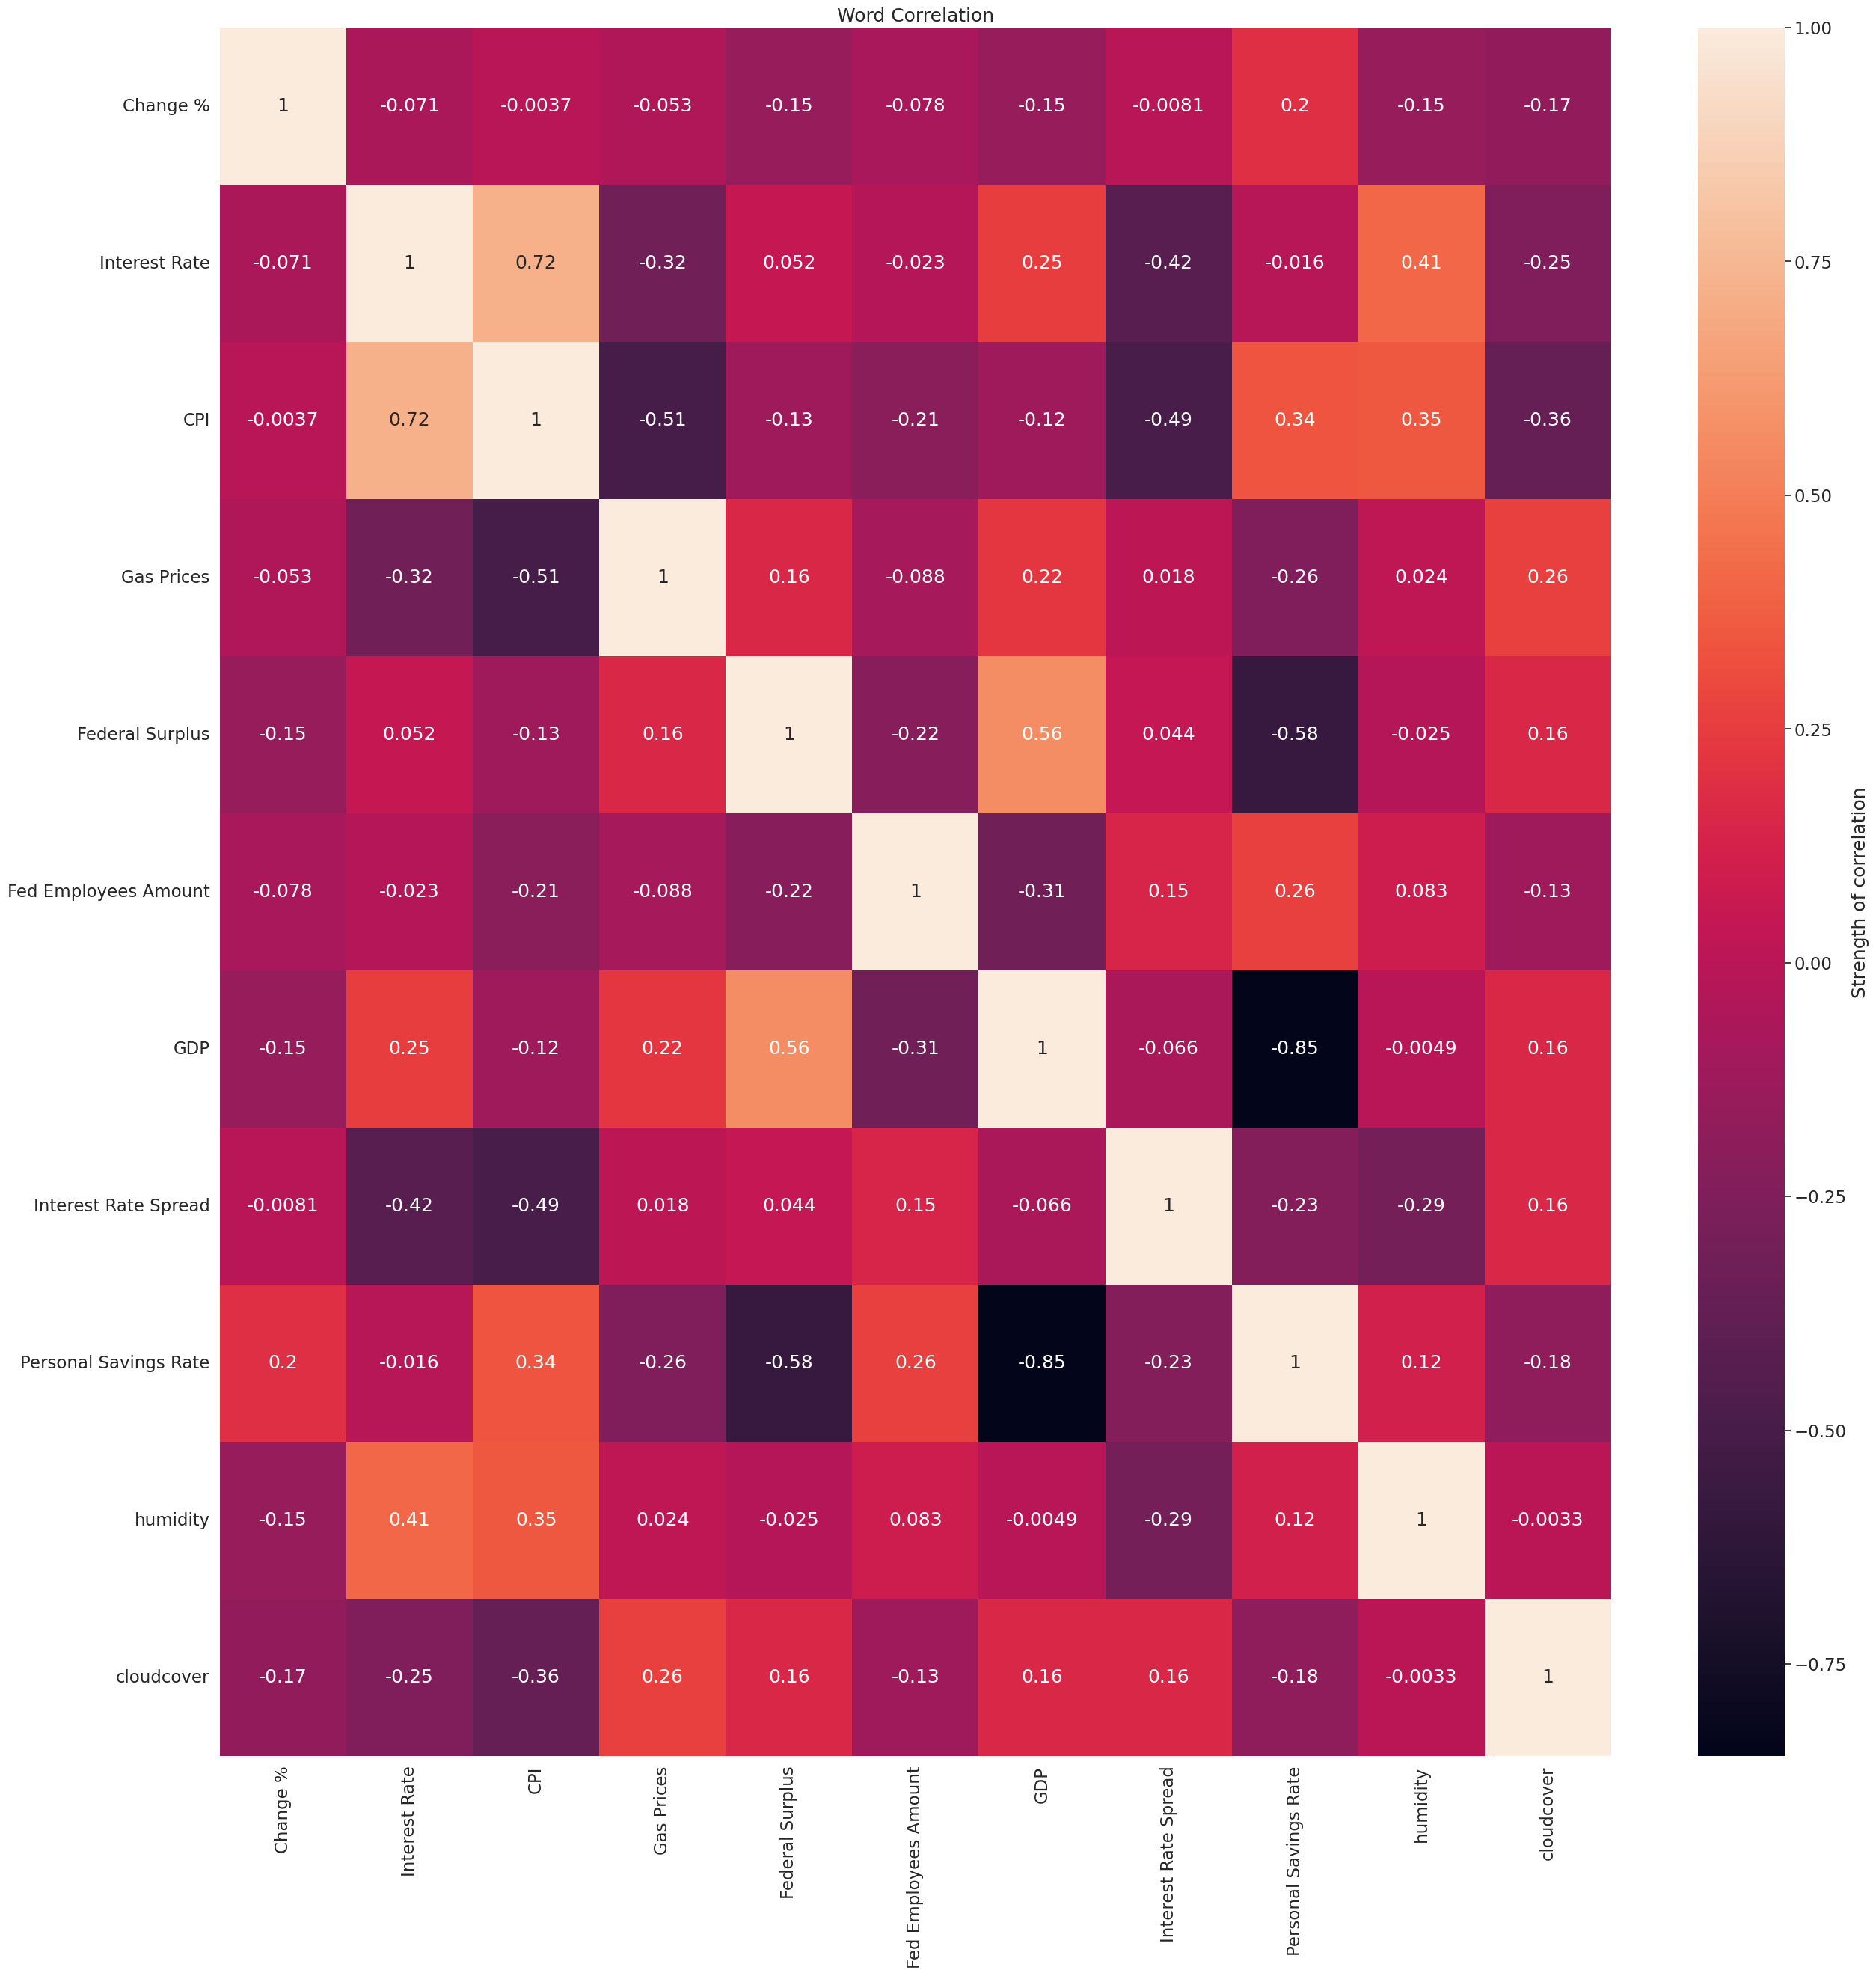

In [ ]:
#Feature correlation matrix to see multicollinearity
all_feautures= X_train
plt.figure(figsize=(30, 30))
sns.heatmap(all_feautures.corr(), cbar_kws={'label':'Strength of correlation'}, annot=True)
plt.title("Word Correlation")
plt.show()

# 2: Models

2a: Linear Regression Models

In [ ]:
#OLS Model
linear_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(linear_model.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_lm = linear_model.predict(sm.add_constant(X_test))

lin_r2 = linear_model.rsquared

lin_osr2 = r2_score(y_test, y_pred_lm)

lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lm))

lin_mae = mean_absolute_error(y_test, y_pred_lm)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     738.1
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          4.02e-101
Time:                        02:33:00   Log-Likelihood:                -728.09
No. Observations:                 127   AIC:                             1480.
Df Residuals:                     115   BIC:                             1514.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.198e+

In [ ]:
#CART model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

grid_values = {
    'ccp_alpha': np.linspace(0, 0.10, 201),
    'min_samples_leaf': [5],
    'min_samples_split': [20],
    'max_depth': [30],
    'random_state': [88]
}

cart = DecisionTreeRegressor()
cart_model = GridSearchCV(cart, param_grid=grid_values, scoring='neg_mean_squared_error', cv=10, verbose=1)
cart_model.fit(X_train, y_train)

cart_mse = cart_model.cv_results_['mean_test_score'] * (-1)
cart_ccp = cart_model.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha': cart_ccp, 'Validation MSE': cart_mse}).head(20)

y_pred_CART_train = cart_model.best_estimator_.predict(X_train)

y_pred_CART = cart_model.best_estimator_.predict(X_test)

cart_r2 = r2_score(y_train, y_pred_CART_train)

cart_osr2 = r2_score(y_test, y_pred_CART)

cart_mae = mean_absolute_error(y_test, y_pred_CART)
cart_rmse = mean_squared_error(y_test, y_pred_CART, squared=False)



Fitting 10 folds for each of 201 candidates, totalling 2010 fits


In [ ]:
#Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_r2 = rf.score(X_train, y_train)

rf_osr2 = r2_score(y_test, y_pred_rf)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

rf_mae = mean_absolute_error(y_test, y_pred_rf)


In [ ]:
#Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)


grad_r2 = gbr.score(X_train, y_train)
grad_osr2 = r2_score(y_test, y_pred_gbr)
grad_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
grad_mae = mean_absolute_error(y_test, y_pred_gbr)

In [ ]:
#Comparing R^2, OSR^2, RMSE and MAE values for all models
comparison_data = {'Linear Regression':[lin_r2,lin_osr2,lin_rmse, lin_mae],
                   'CART':[cart_r2,cart_osr2,cart_rmse, cart_mae],
                   'Random Forest Regressor' :[rf_r2, rf_osr2, rf_rmse, rf_mae],
		  'Gradient Boosting Regressor' :[grad_r2, grad_osr2, grad_rmse, grad_mae]}

comparison_table = pd.DataFrame(data=comparison_data, index=['R^2', 'OSR^2', 'RMSE', 'MAE']).transpose()
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
comparison_table

,R^2,OSR^2,RMSE,MAE
Linear Regression,0.986034,-16.150977,1157.347752,1143.434799
CART,0.974638,-14.681796,1106.667983,1070.801667
Random Forest Regressor,0.997380,-13.530208,1065.259364,1032.109575
Gradient Boosting Regressor,0.999852,-11.952919,1005.780630,978.002052


2b: Time Series Analysis

In [ ]:
#Importing necessary dependencies
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
#Indexing dates to make a separate colummn for time series data
dates = pd.date_range(start="1980-01-01", periods=len(final_df['Price']), freq='M')
timedata = pd.DataFrame({'Date': dates, 'Price': final_df['Price']})
timedata.set_index('Date', inplace=True)

In [ ]:
#Calculating the ADF statistic

final_df['Price']
from statsmodels.tsa.stattools import adfuller
result = adfuller(final_df['Price']
)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.734908
p-value: 0.999088
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


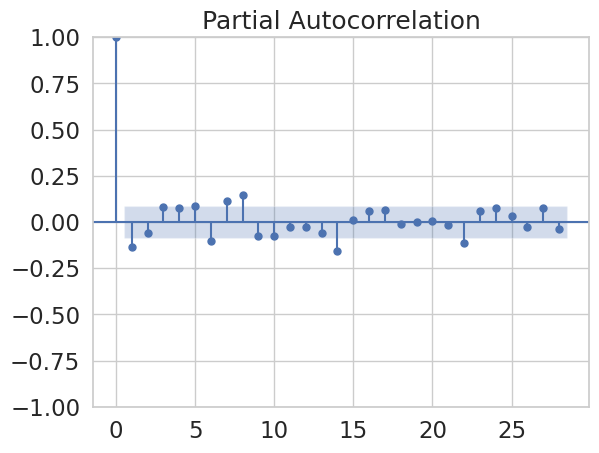

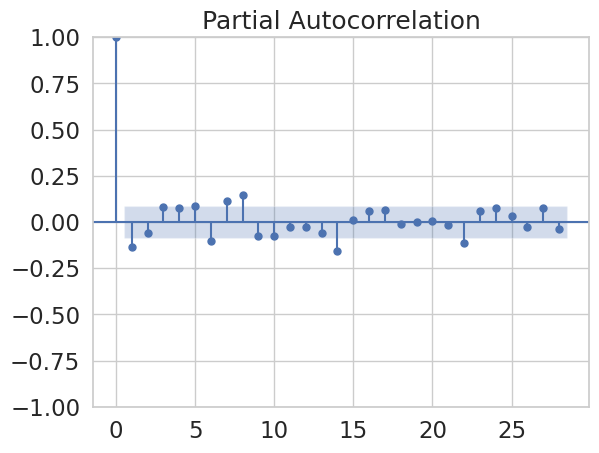

In [ ]:
#Plotting for parameter p
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(final_df.Price.diff().dropna())
#first lag out of limit so choose p = 1

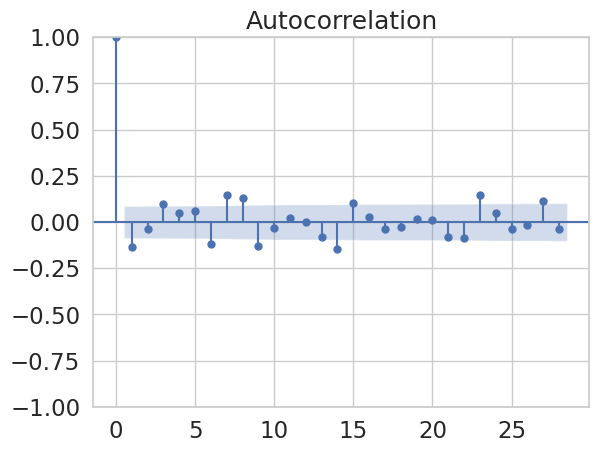

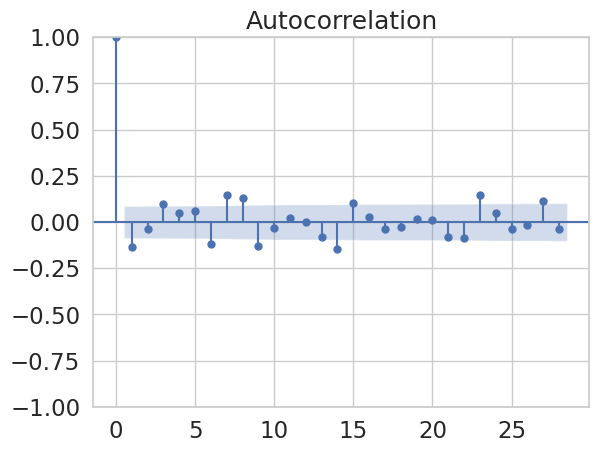

In [ ]:
#Plotting for parameter q
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(final_df.Price.diff().dropna())
#first lag out of limit so choose q = 1

In [ ]:
#function to implement ARIMA in a rolling horizon format
def rolling_horizon_forecast(data, order, test_size):
    train = data[:-test_size]
    test = data[-test_size:]

    history = [x for x in train['Price']]
    predictions = []

    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history.append(test['Price'][t])

    return predictions

In [ ]:
# chosen order = (p,d,q), based on parameter selection done through ACF and PACF graphs
#tried iterating through different orders but received high MSE
order = (2,1,0)
test_size = 37
predictions = rolling_horizon_forecast(timedata, order, test_size)

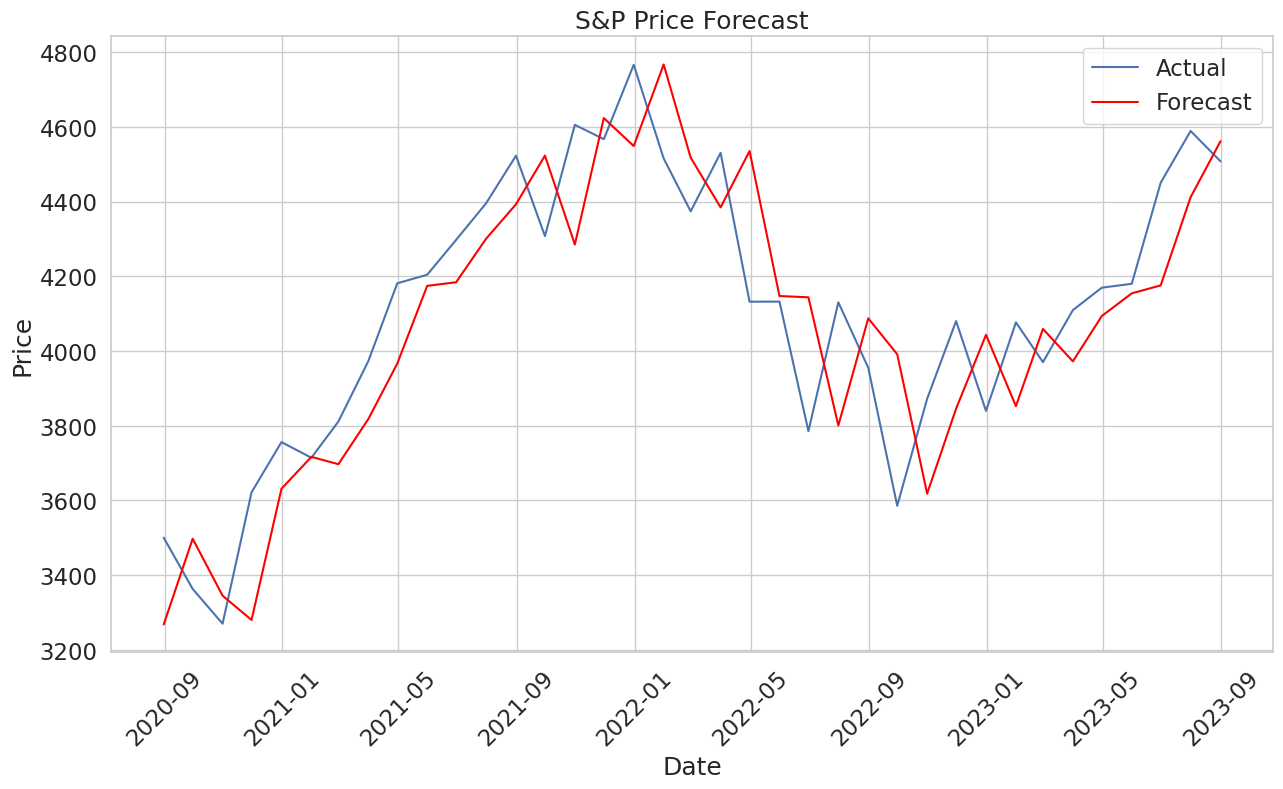

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(timedata.index[-test_size:], timedata['Price'][-test_size:], label='Actual')
plt.plot(timedata.index[-test_size:], predictions, color='red', label='Forecast')
plt.title('S&P Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#'predictions' is list of predicted values and 'actuals' is the actual values
actuals = timedata['Price'][-test_size:].values

ARIMA_mae = mean_absolute_error(actuals, predictions)
ARIMA_mse = mean_squared_error(actuals, predictions)
ARIMA_rmse = np.sqrt(ARIMA_mse)

print("Mean Absolute Error:", ARIMA_mae)
print("Mean Squared Error:", ARIMA_mse)
print("Root Mean Squared Error:", ARIMA_rmse)

Mean Absolute Error: 175.9000415144791
Mean Squared Error: 42541.38986023066
Root Mean Squared Error: 206.25564200823854


In [ ]:
final_df

,DATE,Price,Open,High,Low,Change %,Unemployment Rate,Interest Rate,Gas Prices,Consumer Spending,US to Aus X,Federal Surplus,Fed Employees Amount,CPI,GDP,Interest Rate Spread,Personal Savings Rate,humidity,cloudcover,DEXUSUK
0,1980-01-01,114.16,107.94,117.17,103.26,5.76,6.3,13.816774,1.131,1697.3,1.109677,0.000000,2886.0,78.000,101.605829,96.860369,9.9,56.993548,60.545161,2.264100
1,1980-02-01,113.66,114.16,120.22,111.33,-0.44,6.3,14.126207,1.207,1701.4,1.104126,0.000000,2907.0,79.000,101.259018,97.029528,10.1,52.341379,49.248276,2.289116
2,1980-03-01,102.09,113.66,114.34,94.23,-10.18,6.3,17.192258,1.252,1708.2,1.090338,0.000000,2960.0,80.100,100.836136,97.503811,10.3,63.741935,65.532258,2.204514
3,1980-04-01,106.29,102.09,106.79,98.95,4.11,6.9,17.607667,1.264,1695.2,1.091027,0.000000,3258.0,80.900,100.389157,98.282414,11.4,63.336667,62.396667,2.209364
4,1980-05-01,111.24,106.29,112.72,103.50,4.66,7.5,10.983226,1.266,1700.1,1.130205,0.000000,3088.0,81.700,99.985739,99.200175,11.5,57.870968,62.993548,2.302024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2023-04-01,4169.48,4102.50,4170.52,4049.30,1.46,3.4,4.830000,3.735,18363.8,0.668840,176180.790349,2910.0,302.918,99.866273,98.444913,5.2,58.200000,46.360000,1.244575
520,2023-05-01,4179.83,4166.27,4229.98,4048.00,0.25,3.7,5.055806,3.685,18407.8,0.664345,-240348.239658,2919.0,303.294,99.943470,98.395192,5.3,53.070968,22.500000,1.248373
521,2023-06-01,4450.38,4183.84,4458.43,4171.00,6.47,3.6,5.076333,3.712,18485.4,0.671262,-227768.412538,2925.0,303.841,100.045476,98.443656,4.9,64.846667,44.190000,1.262719
522,2023-07-01,4588.96,4444.17,4606.00,4385.18,3.11,3.5,5.120000,3.732,18621.3,0.674150,-220782.097354,2935.0,304.348,100.164368,98.577464,4.1,69.670968,32.306452,1.289345


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separate the features and the target
features = final_df.drop(columns=['Price',
                                  'DATE'
                                  ])
target = final_df['Price']

# Normalizing the features
feature_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = feature_scaler.fit_transform(features)

# Normalizing the target
target_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Splitting the data into input/output sequences
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps), :]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 1
X, y = create_dataset(scaled_features, scaled_target, time_steps)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.067, shuffle=False)

# LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predictions
y_pred = model.predict(X_test)

# Inverse transform to original scale for target
y_pred_original = target_scaler.inverse_transform(y_pred)
y_test_original = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE

LSTM_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
LSTM_mse = mean_squared_error(y_test_original, y_pred_original)
LSTM_mae = mean_absolute_error(y_test_original, y_pred_original)
print('LSTM Test RMSE: ', LSTM_rmse)
print('LSTM Test MSE: ', (mean_squared_error(y_test_original, y_pred_original)))
print('LSTM Test MAE: ', mean_absolute_error(y_test_original, y_pred_original))


Epoch 1/50
16/16 [==============================] - 5s 5ms/step - loss: 0.0489
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0256
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0179
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 10/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 13/50
16/16 [==============================

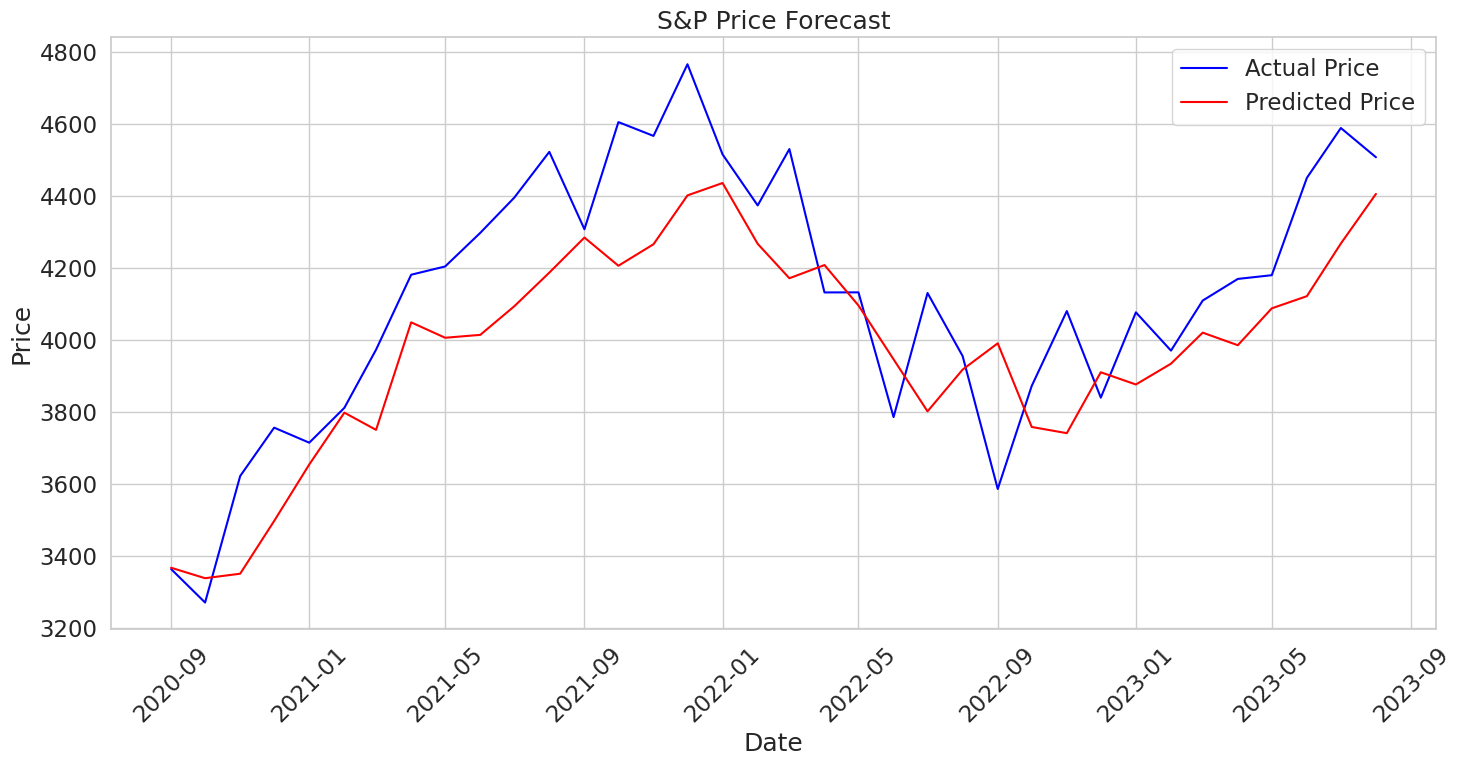

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y_test_original' is the actual values and 'y_pred_original' is the predicted values
# and that you have a 'DATE' column in your original 'final_df' DataFrame for the x-axis

# Extract dates for the test set
test_dates = final_df['DATE'][-len(y_test_original):]

plt.figure(figsize=(15, 8))
plt.plot(test_dates, y_test_original, label='Actual Price', color='blue')
plt.plot(test_dates, y_pred_original, label='Predicted Price', color='red')

plt.title('S&P Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)  # Rotates the date labels to prevent overlap
plt.tight_layout()

plt.show()


In [ ]:
time_comparison_data = {
    'ARIMA': [ARIMA_mae, ARIMA_mse, ARIMA_rmse],
    'LSTM': [LSTM_mae, LSTM_mse, LSTM_rmse]
}

# Create DataFrame
comparison_table = pd.DataFrame(data=time_comparison_data, index=['MAE', 'MSE', 'RMSE']).transpose()
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

# Display the table
comparison_table

,MAE,MSE,RMSE
ARIMA,175.900042,42541.389860,206.255642
LSTM,277.638649,96117.159941,310.027676
